In [1]:
#Testing of Normality of a given data

# Shapiro-Wilk Test
import pandas as pd
import numpy as np
import random as random
from scipy.stats import shapiro ,norm 
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline
df2 = pd.read_csv('ac.csv', names = ['thickness(mm)' , 'x', 'Counting(N)', 'lnN', 'se']) 
df2

,thickness(mm),x,Counting(N),lnN,se
0,0.05,0.135,414,6.025866,0.1
1,0.10,0.270,367,5.905362,0.2
2,0.15,0.405,274,5.613128,0.9
3,0.20,0.540,237,5.468060,0.4
4,0.25,0.675,189,5.241747,0.4
5,0.30,0.810,155,5.043425,0.3
6,0.35,0.945,175,5.164786,0.2
7,0.40,1.080,141,4.948760,0.1
8,0.55,1.485,139,4.934474,0.3
9,0.95,2.565,134,4.897840,0.6


In [2]:
# normality test
stat, p = shapiro(df2.lnN)
print('Statistics=%.3f, p=%.3f' % (stat, p))


Statistics=0.892, p=0.177


# Since the p value is greater than 0.05 , we can say that the given distribution is  normal. 

In [3]:
f = df2.lnN
sd =f.std()
mu = f.mean()
a ,b = mu-3*sd, mu+3*sd
x = np.linspace(a,b,1000)
y = norm.pdf(x, loc = mu, scale = sd)

(array([2.65951276, 0.88650425, 0.88650425, 0.88650425, 0.        ,
        0.88650425, 0.88650425, 0.        , 0.88650425, 0.88650425]),
 array([4.8978398 , 5.01064242, 5.12344503, 5.23624765, 5.34905027,
        5.46185289, 5.5746555 , 5.68745812, 5.80026074, 5.91306336,
        6.02586597]),
 <a list of 10 Patch objects>)

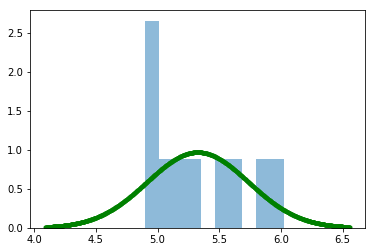

In [4]:


plt.plot(x,y,'.g')

plt.hist(f,alpha=.5, density = True) 

In [5]:
## QQ plot

In [6]:
import statsmodels.api as sm 
import pylab as py 

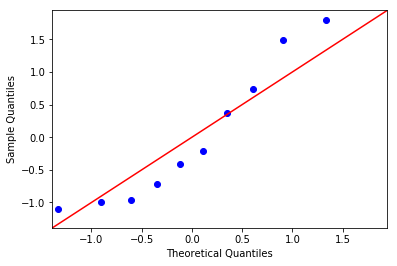

In [7]:
sm.qqplot(f, fit= True, line = "45") 
py.show() 

In [8]:
#Standard error  of the mean, standard deviation, mean 

In [9]:
from scipy.stats import sem 


In [10]:
sem(df2.lnN)


0.12995425598634347

In [11]:
np.std(df2.lnN) 

0.38986276795903035

In [12]:
np.mean(df2.lnN)

5.3243447798800005

# Curve Fitting 

In [13]:
import numpy as np
from scipy.optimize import curve_fit
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt

-0.45283116604484575
5.72781734882596


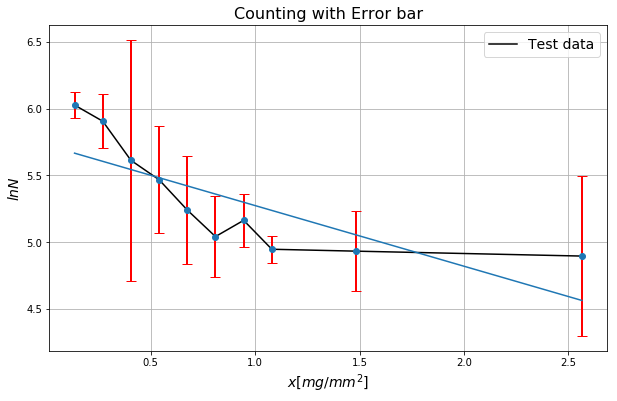

In [25]:

data = np.loadtxt("ac.csv",delimiter = ',')
#data = np.loadtxt("test4multiplot.txt", dtype = str)     #if file contains multiple data types
#data
x = data[:,1]
y = data[:,3]
yerror = data[:,4]
#plot data
plt.figure(figsize = [10,6])
plt.plot(x,y,"-", color = "black", label = "Test data")
plt.errorbar(x,y, yerr = yerror,ecolor = 'red', elinewidth =2,capsize =5, fmt = 'o')
m , b = np.polyfit(x,y,1)
print(m)  # m = slpoe and b = intercept
print(b)

plt.plot(x,m*x+b)

plt.title("Counting with Error bar", fontsize=16)
plt.xlabel('$x[mg/mm^2]$', fontsize=14)
plt.ylabel('$ ln N $', fontsize=14)
plt.legend(fontsize=14)
plt.grid(True)                                 # comment this if u do not need grid
plt.show()

# Confidence interval 

In [ ]:


import scipy.stats as st


In [ ]:
y = data[:,3] 
st.t.interval(alpha=0.95, df=len(y)-1, loc=np.mean(y),scale=st.sem(y))

In [ ]:
def lin_fun(x,a1,a2):
    return a1*x + a2
def cos_fun(x,a3,a4,a5,a6):
    return a3*np.cos(x+a4)*np.exp(-x*a5) + a6

def exp_fun(x,a7,a8,a9):
    return a7*np.exp(-a8*x) + a9


In [ ]:
#curve_fit to find best fit parameters using a least square fit.
popt,pcov = curve_fit(lin_fun,x,y)
p1,p2 = popt
print(popt)
print(pcov)
print("a1 = ", popt[0], "+-", pcov[0,0]**0.5)
print("a2 = ", popt[1], "+-", pcov[1,1]**0.5)

#x1_fit = np.arange(min(x1),max(x1),1)
#x1_fit = np.arange(min(x),max(x)+1.0,1)
y1_fit = lin_fun(x, p1, p2)

plt.figure(figsize = [10,6])
plt.plot(x,y,"o", label = "data")
plt.plot(x,y1_fit,"--", label = "fit")
plt.legend()

In [ ]:
from numpy import cov
from scipy.stats import pearsonr

In [ ]:
covariance = cov(x,y)
print(covariance)
corr , _ = pearsonr(x,y)
print("Pearson correlation : %.3f" %corr)

# High level of correlation(nearly equal to -1) i.e. greater than 0.5 and a negative correlation. 

In [ ]:
#np.cov(data)
# correlation between x and y
# t test
# result significance from p value

In [ ]:
# https://www.statsmodels.org/stable/generated/statsmodels.graphics.gofplots.qqplot.html

In [ ]:
# https://github.com/dharmapaudel 